In [8]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('..')
import script.data as data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
ticker = '605168'

In [10]:
income = data.get_IS(ticker)
incomeq = data.get_ISQ(ticker)
income.rename(columns={'归属于母公司所有者的净利润': '净利润'}, inplace=True)
incomeq.rename(columns={'归属于母公司所有者的净利润': '净利润'}, inplace=True)

In [11]:
change = income[['营业总收入', '营业总成本', '净利润']].pct_change(periods=-1).round(3) * 100
income_change = pd.concat([income[['截止日期', '净利润', '基本每股收益', '稀释每股收益']], change], axis=1)
income_change

,截止日期,净利润,基本每股收益,稀释每股收益,营业总收入,营业总成本,净利润
94763,2019-12-31,1.936231e+08,3.74,3.74,48.4,48.5,56.1
94764,2018-12-31,1.240305e+08,2.39,2.39,45.0,48.6,26.9
94766,2017-12-31,9.776268e+07,1.89,1.89,105.6,131.7,34.7
94770,2016-12-31,7.255329e+07,NaN,NaN,297.9,264.4,476.2
94773,2014-12-31,1.259060e+07,0.36,0.36,-5.0,-10.5,113.5
94774,2013-12-31,5.897251e+06,0.56,0.56,41.3,40.4,24.7
94776,2012-12-31,4.730676e+06,NaN,NaN,NaN,NaN,NaN


In [12]:
change = incomeq[['营业收入', '净利润']].pct_change(periods=-4).round(3) * 100
incomeq_change = pd.concat([incomeq[['截止日期', '营业收入', '净利润']], change], axis=1)
incomeq_change[:24]

,截止日期,营业收入,净利润,营业收入,净利润
152578,2020-06-30,7.046395e+08,62299194.67,1824.1,579.5
152579,2020-03-31,4.448480e+08,40422308.72,2246.6,3608.0
152580,2019-06-30,3.886193e+08,29821559.88,NaN,NaN
152581,2019-03-31,3.243340e+08,15280075.80,NaN,NaN
152582,2014-12-31,3.662268e+07,9168515.34,NaN,NaN
152583,2014-09-30,1.895752e+07,1090140.41,NaN,NaN


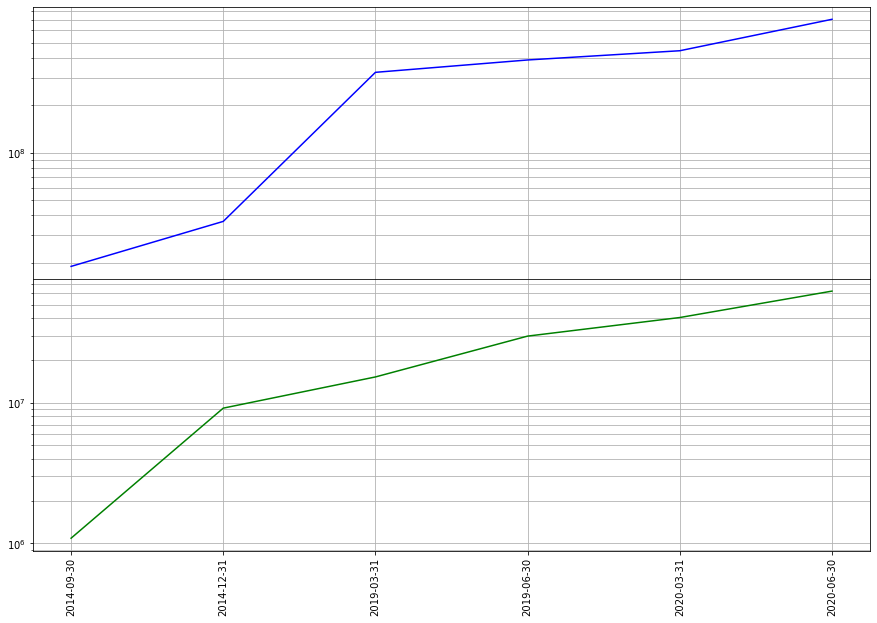

In [13]:
plt.figure(figsize=(15,10))
ax = plt.subplot(211)
plt.plot(incomeq['截止日期'][::-1], incomeq['营业收入'][::-1], 'b-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
ax = plt.subplot(212)
plt.plot(incomeq['截止日期'][::-1], incomeq['净利润'][::-1], 'g-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.0)
plt.show()

In [14]:
df = data.get_market(ticker)
df.groupby(df['交易日期'].dt.year).agg(['min', 'max'])[-10:]

交易日期               收盘价           累积前复权因子         滚动市盈率         
            min        max    min     max       min  max      min      max
交易日期                                                                      
2020 2020-05-28 2020-10-19  87.29  293.78  0.994894  1.0  27.5585  92.7497